## HEART DISEASE DIAGNOSTIC ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Heart Disease data.csv")

In [4]:
#display top 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
#shape of dataset
data.shape

(1025, 14)

In [8]:
#show necessary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
#check null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#check for duplicate data and drop them
data_dup=data.duplicated().any()
print(data_dup)

True


In [11]:
data=data.drop_duplicates()

In [12]:
data.shape

(302, 14)

In [13]:
#summary statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

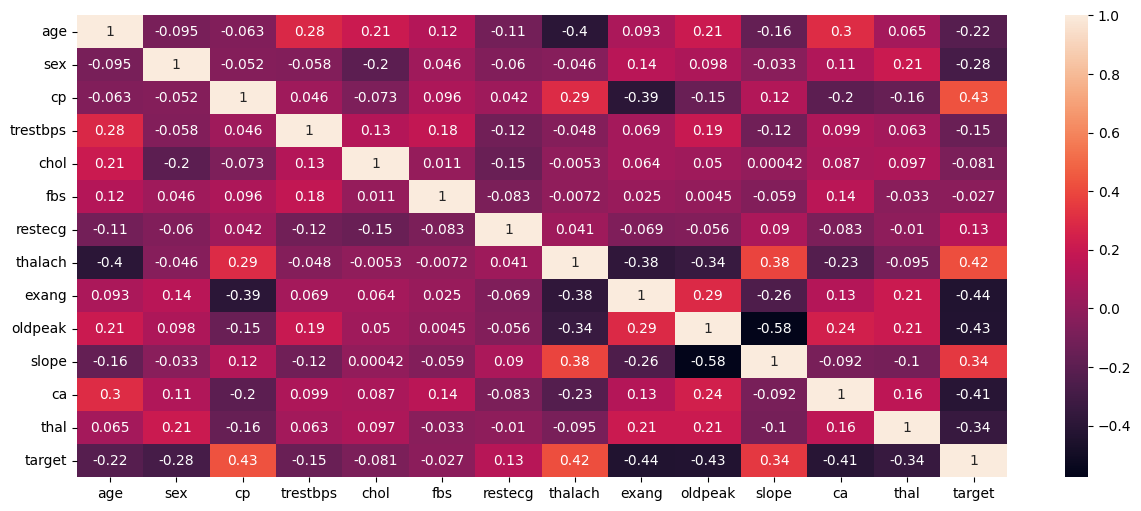

In [16]:
#correlation matrix
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### checking how many people have heart disease and how many don't

In [26]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

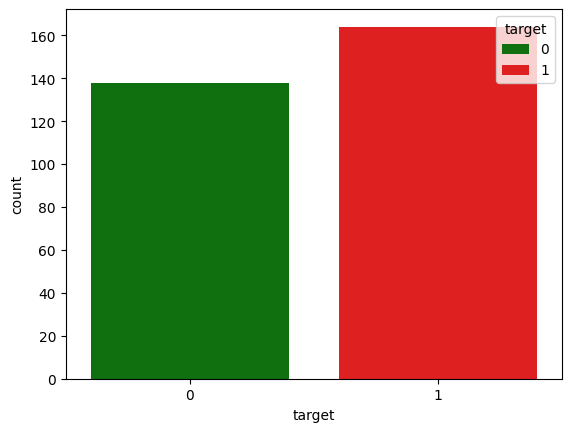

In [27]:
p=sns.color_palette(['green','red'])
sns.countplot(x='target',data=data,hue='target',palette=p)
plt.show()

### Count of Male and Female in dataset

In [28]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

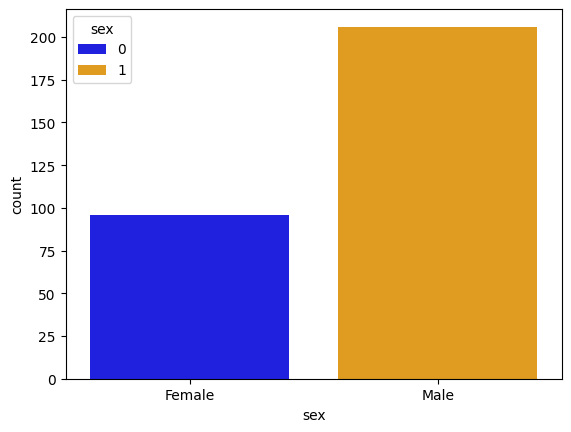

In [30]:
p=sns.color_palette(['blue','orange'])
sns.countplot(x='sex',data=data,hue='sex',palette=p)
plt.xticks([0,1],['Female','Male'])
plt.show()

Gender Distribution according to the Target variable


In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

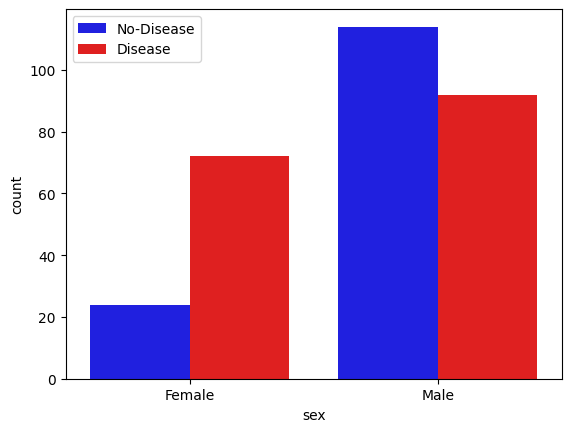

In [35]:
p=sns.color_palette(['blue','red'])
sns.countplot(x='sex',data=data,hue='target',palette=p)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

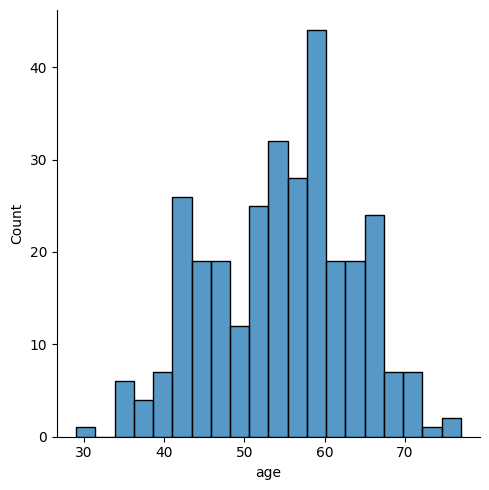

In [39]:
#Age distribution
sns.displot(data['age'],bins=20)
plt.show()

# Check Chest Pain Type

chest pain type (4 values):

    value 0: typical angina
    value 1: atypical angina
    value 2: non-anginal pain
    value 3: asymptomatic

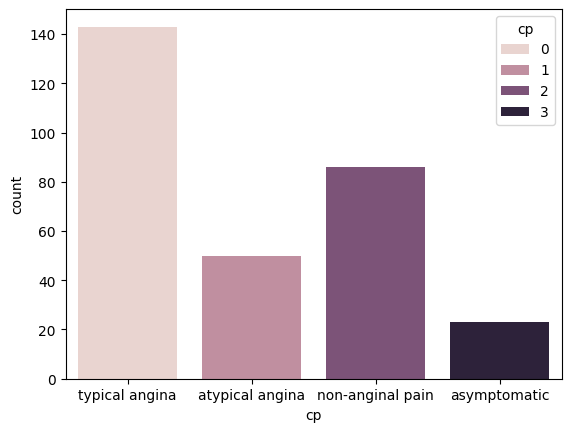

In [43]:
sns.countplot(x='cp',data=data,hue='cp',)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

chest pain of type typical angina is higher in heart disease patients

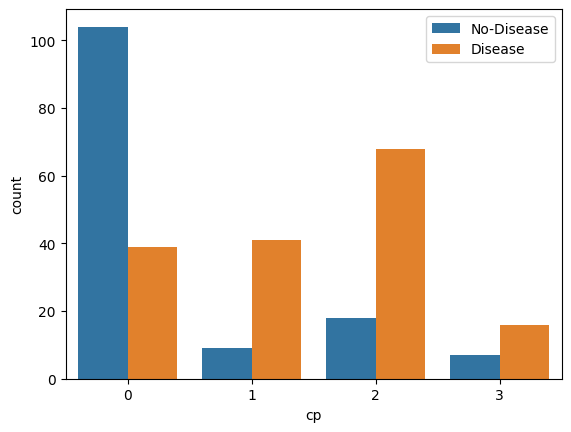

In [44]:
#chest pain distribution as per Target Variable
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

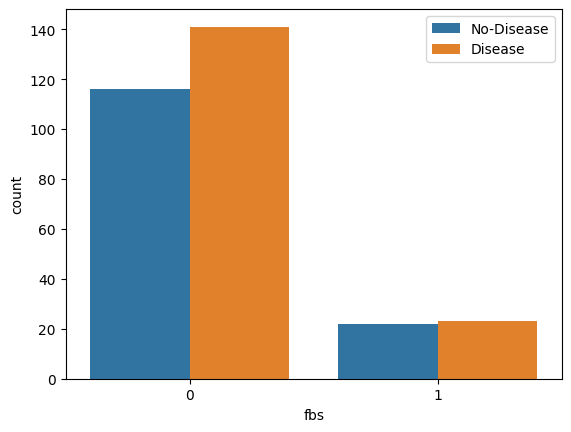

In [45]:
#Show Fasting Blood Sugar Distribution according to Target Variable
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

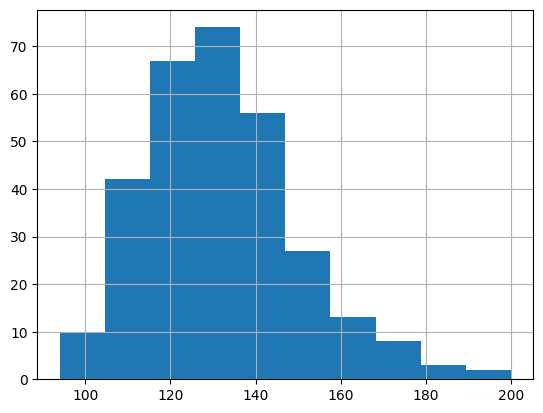

In [59]:
#check resting Blood pressure Distribution
data['trestbps'].hist()
plt.show()

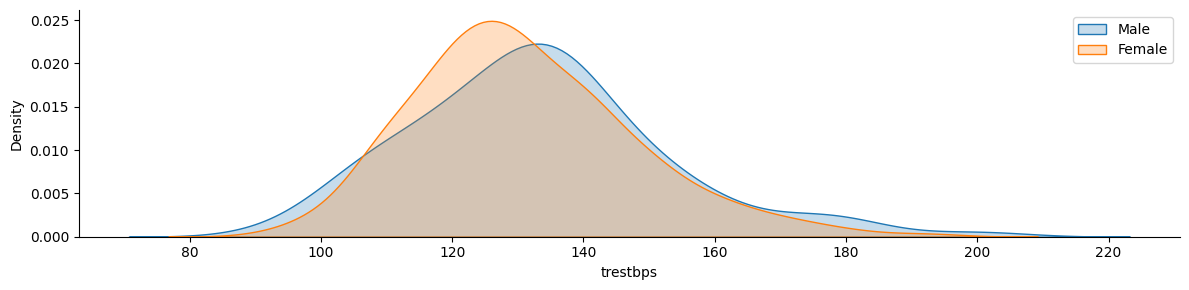

In [50]:
#compare Resting Blood Pressure as per Sex column
g=sns.FacetGrid(data,hue="sex",aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.show()

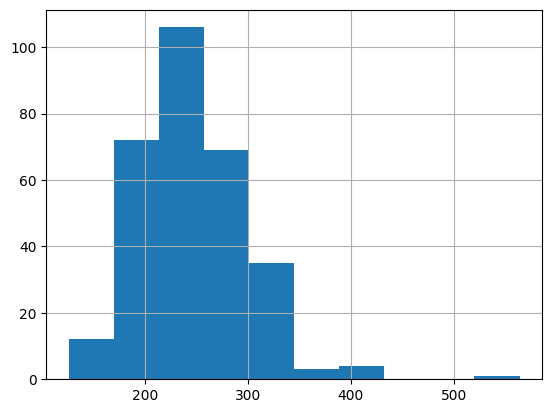

In [52]:
#Show Distribution of Serum Cholesterol
data['chol'].hist()
plt.show()

### Plot Continuous Variables

In [53]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [54]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [55]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [56]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

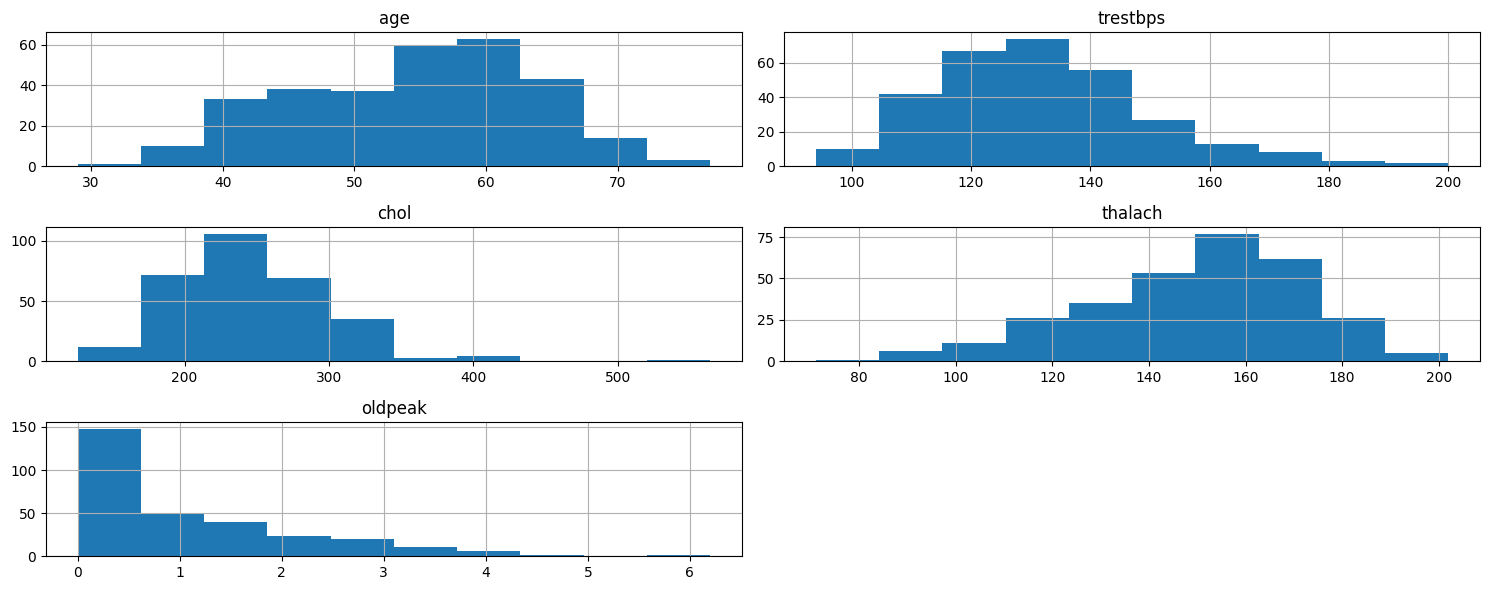

In [58]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()